20BRS1075 Aman Gupta


In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing
import graphviz
from sklearn.metrics import accuracy_score,confusion_matrix,recall_score,precision_score

In [ ]:
data=pd.read_csv("/content/Buy_Computer.csv")
data.head()

,id,age,income,student,credit_rating,Buy_Computer
0,1,youth,high,no,fair,no
1,2,youth,high,no,excellent,no
2,3,middle_age,high,no,fair,yes
3,4,senior,medium,no,fair,yes
4,5,senior,low,yes,fair,yes


In [ ]:
data=data.drop("id",axis=1)
data.head()

,age,income,student,credit_rating,Buy_Computer
0,youth,high,no,fair,no
1,youth,high,no,excellent,no
2,middle_age,high,no,fair,yes
3,senior,medium,no,fair,yes
4,senior,low,yes,fair,yes


In [ ]:
X=data.iloc[:,:4]
y=data.iloc[:,4]
print(X)
print(y)
print(X)


           age  income student credit_rating
0        youth    high      no          fair
1        youth    high      no     excellent
2   middle_age    high      no          fair
3       senior  medium      no          fair
4       senior     low     yes          fair
5       senior     low     yes     excellent
6   middle_age     low     yes     excellent
7        youth  medium      no          fair
8        youth     low     yes          fair
9       senior  medium     yes          fair
10       youth  medium     yes     excellent
11  middle_age  medium      no     excellent
12  middle_age    high     yes          fair
13      senior  medium      no     excellent
0      no
1      no
2     yes
3     yes
4     yes
5      no
6     yes
7      no
8     yes
9     yes
10    yes
11    yes
12    yes
13     no
Name: Buy_Computer, dtype: object


In [ ]:
le = preprocessing.LabelEncoder()
y=le.fit_transform(y)
for i in range(4):
  X.iloc[:,i]=le.fit_transform(X.iloc[:,i])
print(X)
print(y)

    age  income  student  credit_rating
0     2       0        0              1
1     2       0        0              0
2     0       0        0              1
3     1       2        0              1
4     1       1        1              1
5     1       1        1              0
6     0       1        1              0
7     2       2        0              1
8     2       1        1              1
9     1       2        1              1
10    2       2        1              0
11    0       2        0              0
12    0       0        1              1
13    1       2        0              0
[0 0 1 1 1 0 1 0 1 1 1 1 1 0]


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1951: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[selected_item_labels] = value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3, random_state=0)
print("training dataset:\n",xtrain,"\n",ytrain)
print("\ntesting dataset:\n",xtest,"\n",ytest)

training dataset:
     age  income  student  credit_rating
13    1       2        0              0
9     1       2        1              1
1     2       0        0              0
7     2       2        0              1
10    2       2        1              0
3     1       2        0              1
0     2       0        0              1
5     1       1        1              0
12    0       0        1              1 
 [0 1 0 0 1 1 0 0 1]

testing dataset:
     age  income  student  credit_rating
8     2       1        1              1
6     0       1        1              0
4     1       1        1              1
11    0       2        0              0
2     0       0        0              1 
 [1 1 1 1 1]


In [ ]:
#GINI INDEX
dt=tree.DecisionTreeClassifier()
model= dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print("the predicted y values: ",ypred)
print("the test y values: ",ytest)
print("the score for the training data set is: ",model.score(xtest,ytest))

the predicted y values:  [0 1 0 0 1]
the test y values:  [1 1 1 1 1]
the score for the training data set is:  0.4


[Text(0.5555555555555556, 0.875, 'X[2] <= 0.5\ngini = 0.494\nsamples = 9\nvalue = [5, 4]'),
 Text(0.3333333333333333, 0.625, 'X[0] <= 1.5\ngini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.375, 'X[3] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.375, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.625, 'X[1] <= 1.5\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7777777777777778, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8888888888888888, 0.375, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]')]

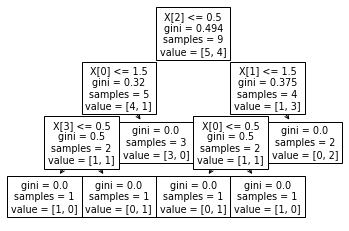

In [ ]:
tree.plot_tree(model)

the predicted y values:  [0 1 0 0 1]
the test y values:  [1 1 1 1 1]
the score for the training data set is:  0.4


[Text(0.5555555555555556, 0.875, 'X[2] <= 0.5\nentropy = 0.991\nsamples = 9\nvalue = [5, 4]'),
 Text(0.3333333333333333, 0.625, 'X[0] <= 1.5\nentropy = 0.722\nsamples = 5\nvalue = [4, 1]'),
 Text(0.2222222222222222, 0.375, 'X[3] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.1111111111111111, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.3333333333333333, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.4444444444444444, 0.375, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.7777777777777778, 0.625, 'X[1] <= 1.5\nentropy = 0.811\nsamples = 4\nvalue = [1, 3]'),
 Text(0.6666666666666666, 0.375, 'X[0] <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 1]'),
 Text(0.5555555555555556, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.7777777777777778, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8888888888888888, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]')]

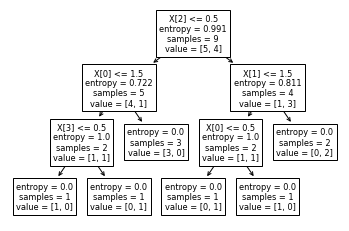

In [ ]:
#ENTROPY
dt=tree.DecisionTreeClassifier(criterion='entropy')
model1= dt.fit(xtrain,ytrain)
ypred=dt.predict(xtest)
print("the predicted y values: ",ypred)
print("the test y values: ",ytest)
print("the score for the training data set is: ",model1.score(xtest,ytest))
tree.plot_tree(model1)